# Analysis on the raw combined count (sorted_F320)

In [57]:
# Variable - File Name (System Cell, Don't delete!, Update if renamed)
fileName='data_analysis_sorted_new_count_table.ipynb'
workspace='ngs/sander/phage_infection_time_course_e_coli_rnaseq/yan_results'

In [3]:
# Variable : Parents used by the automaticaly generated result dataset (System Cell, Don't delete!)
resultDatasetParents=[workspace]

In [4]:
import sys
import os
import pandas as pd
from pyCRAC.Parsers import GTF2
import matplotlib
import matplotlib.pyplot as plt

In [5]:
def loadDataFile(datafile):
    data = pd.read_csv(datafile,index_col=0,header=0,comment="#",sep="\t",skip_blank_lines=True)
    return data

In [6]:
def TPMNormalization(data,genelengths=[]):
    """ Calculates Transcripts per million for the raw count data """
    normdata = data.div(genelengths,axis=0)
    return normdata.div(normdata.sum(axis=0)/1000000) 

In [7]:
def TPNormalization(data,genelengths=[]):
    """ Calculates Transcripts for the raw count data """
    normdata = data.div(genelengths,axis=0)
    return normdata

In [8]:
def ExpNormalization(data):
    """Calculate the percent of the expression on each time point counting for the total"""
    return data.div(data[column_names].sum(axis=1))

In [9]:
def draw_mean(group,table):
    a=table.loc[group,plot_column]
    x = [0,5,10,15,20]
    label=a.index
    plt.figure()
    for i in label:
        y=list(a.loc[i])
        plt.plot(x,y,label=i)
    plt.legend()
    plt.show()

# Load the data

In [10]:
gtf = GTF2.Parse_GTF()
gtf.read_GTF('Escherichia_coli_K12_and_T1_phage_genome.gtf')

In [11]:
data = loadDataFile('sorted_count_table.csv')

In [12]:
data.head()

,a1_rep1_control_t-5,a7_rep2_control_t-5,a13_rep3_control_t-5,a6_rep1_control_t20,a12_rep2_control_t20,a18_rep3_control_t20,a2_rep1_+T4_t5,a8_rep2_+T4_t5,a15_rep3_+T4_t5,a3_rep1_+T4_t10,a9_rep2_+T4_t10,a16_rep3_+T4_t10,a4_rep1_+T4_t15,a10_rep2_+T4_t15,a5_rep1_+T4_t20,a11_rep2_+T4_t20,a17_rep3_+T4_t20
gene_name,,,,,,,,,,,,,,,,,
thrL,371,477,478,380,357,494,249,264,238,291,329,192,161,238,141,111,105
thrA,14236,6390,13243,6179,7220,12410,4725,3811,5434,4779,4127,3415,3064,2535,2433,1529,2563
thrB,7561,3181,6344,2124,2215,3636,1697,1192,1786,1870,1406,1224,1131,1011,933,583,836
thrC,13887,5904,11449,3037,2776,5035,2630,1691,2554,2721,1881,1796,1755,1348,1349,795,1290
yaaX,1388,582,906,399,297,418,360,268,355,339,297,270,241,191,185,116,132


In [13]:
data.columns=["C0_1","C0_2","C0_3",
              "C20_1","C20_2","C20_3",
              "E5_1","E5_2","E5_3",
              "E10_1","E10_2","E10_3",
              "E15_1","E15_2",
              "E20_1","E20_2","E20_3"
             ]

In [14]:
data.head()

,C0_1,C0_2,C0_3,C20_1,C20_2,C20_3,E5_1,E5_2,E5_3,E10_1,E10_2,E10_3,E15_1,E15_2,E20_1,E20_2,E20_3
gene_name,,,,,,,,,,,,,,,,,
thrL,371,477,478,380,357,494,249,264,238,291,329,192,161,238,141,111,105
thrA,14236,6390,13243,6179,7220,12410,4725,3811,5434,4779,4127,3415,3064,2535,2433,1529,2563
thrB,7561,3181,6344,2124,2215,3636,1697,1192,1786,1870,1406,1224,1131,1011,933,583,836
thrC,13887,5904,11449,3037,2776,5035,2630,1691,2554,2721,1881,1796,1755,1348,1349,795,1290
yaaX,1388,582,906,399,297,418,360,268,355,339,297,270,241,191,185,116,132


In [15]:
data.columns

Index(['C0_1', 'C0_2', 'C0_3', 'C20_1', 'C20_2', 'C20_3', 'E5_1', 'E5_2',
       'E5_3', 'E10_1', 'E10_2', 'E10_3', 'E15_1', 'E15_2', 'E20_1', 'E20_2',
       'E20_3'],
      dtype='object')

In [16]:
data.head()

,C0_1,C0_2,C0_3,C20_1,C20_2,C20_3,E5_1,E5_2,E5_3,E10_1,E10_2,E10_3,E15_1,E15_2,E20_1,E20_2,E20_3
gene_name,,,,,,,,,,,,,,,,,
thrL,371,477,478,380,357,494,249,264,238,291,329,192,161,238,141,111,105
thrA,14236,6390,13243,6179,7220,12410,4725,3811,5434,4779,4127,3415,3064,2535,2433,1529,2563
thrB,7561,3181,6344,2124,2215,3636,1697,1192,1786,1870,1406,1224,1131,1011,933,583,836
thrC,13887,5904,11449,3037,2776,5035,2630,1691,2554,2721,1881,1796,1755,1348,1349,795,1290
yaaX,1388,582,906,399,297,418,360,268,355,339,297,270,241,191,185,116,132


## The percentage of T1 compared to the sum of T1 and Ecoli, using the raw count as input

In [69]:
raw_counts_phageT1_Ecoli = pd.DataFrame()

In [70]:
raw_counts_phageT1_Ecoli['mean_C0'] = data.loc[:,'C0_1':'C0_3'].mean(axis=1)
raw_counts_phageT1_Ecoli['mean_E5'] = data.loc[:,'E5_1':'E5_3'].mean(axis=1)
raw_counts_phageT1_Ecoli['mean_E10'] = data.loc[:,'E10_1':'E10_3'].mean(axis=1)
raw_counts_phageT1_Ecoli['mean_E15'] = data.loc[:,'E15_1':'E15_2'].mean(axis=1)
raw_counts_phageT1_Ecoli['mean_E20'] = data.loc[:,'E20_1':'E20_3'].mean(axis=1)

In [71]:
raw_counts_phageT1_Ecoli

,mean_C0,mean_E5,mean_E10,mean_E15,mean_E20
gene_name,,,,,
thrL,442.000000,250.333333,270.666667,199.5,119.000000
thrA,11289.666667,4656.666667,4107.000000,2799.5,2175.000000
thrB,5695.333333,1558.333333,1500.000000,1071.0,784.000000
thrC,10413.333333,2291.666667,2132.666667,1551.5,1144.666667
yaaX,958.666667,327.666667,302.000000,216.0,144.333333
...,...,...,...,...,...
5,1.333333,42694.666667,65320.666667,64465.5,38101.333333
4,1.000000,13399.666667,19961.666667,18941.0,12501.666667
3,1.333333,25462.666667,37841.000000,37364.0,25518.666667


In [72]:
 raw_counts_phageT1_Ecoli.iloc[4496:4574]

,mean_C0,mean_E5,mean_E10,mean_E15,mean_E20
gene_name,,,,,
77,1.333333,51330.000000,68600.333333,63690.5,52453.666667
76,1.333333,29238.000000,42641.333333,40791.0,33680.000000
75,0.000000,41645.000000,48056.666667,37228.0,26761.333333
74,0.666667,38714.333333,51311.000000,42548.5,31499.000000
73,0.333333,22023.666667,31515.666667,27287.5,21309.000000
...,...,...,...,...,...
5,1.333333,42694.666667,65320.666667,64465.5,38101.333333
4,1.000000,13399.666667,19961.666667,18941.0,12501.666667
3,1.333333,25462.666667,37841.000000,37364.0,25518.666667


In [73]:
raw_counts_phageT1_Ecoli.loc['sum_Ecoli_T1'] = raw_counts_phageT1_Ecoli.sum()
raw_counts_phageT1_Ecoli.loc['sum_T1'] = raw_counts_phageT1_Ecoli.iloc[4496:4574].sum()
raw_counts_phageT1_Ecoli.loc['percentage_of_T1_compared_to_all'] = raw_counts_phageT1_Ecoli.loc['sum_T1'].div(raw_counts_phageT1_Ecoli.loc['sum_Ecoli_T1'],axis=0)

In [74]:
raw_counts_phageT1_Ecoli.tail()

,mean_C0,mean_E5,mean_E10,mean_E15,mean_E20
gene_name,,,,,
2,3.333333e-01,1.900800e+04,2.406900e+04,1.867850e+04,1.159767e+04
1,6.666667e-01,3.594300e+04,4.133100e+04,2.879050e+04,1.682000e+04
sum_Ecoli_T1,4.743192e+07,4.874184e+07,4.360193e+07,3.392218e+07,3.741842e+07
sum_T1,8.833333e+01,1.638001e+06,4.282916e+06,9.702599e+06,1.740103e+07
percentage_of_T1_compared_to_all,1.862318e-06,3.360564e-02,9.822769e-02,2.860252e-01,4.650390e-01


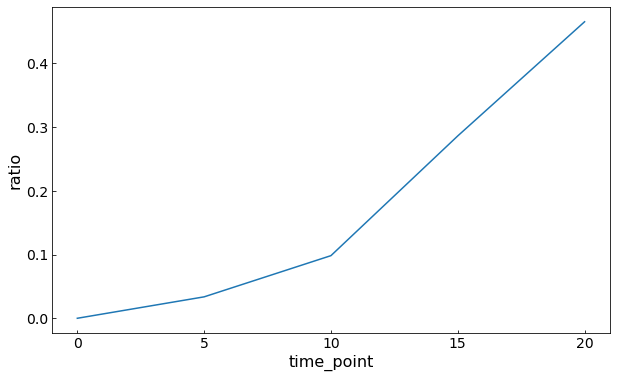

In [86]:
x = ['0','5','10','15','20']
y = raw_counts_phageT1_Ecoli.loc['percentage_of_T1_compared_to_all'].values
plt.figure(figsize=(10, 6))
#设置刻度线属性时，要在绘图前的最开始设置刻度线向内
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.xlabel('time_point',fontsize=16)
plt.ylabel('ratio',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.title('T1 compared to the sum of T1 and Ecoli(raw counts)',fontsize=18)
plt.plot(x,y)
plt.savefig("The percentage of T1 compared to the sum of T1 and Ecoli(raw counts)_sorted_new",dpi=150)

## The percentage of T1 compared to the sum of T1 and Ecoli, using TP on the raw count

In [76]:
data.head()

,C0_1,C0_2,C0_3,C20_1,C20_2,C20_3,E5_1,E5_2,E5_3,E10_1,E10_2,E10_3,E15_1,E15_2,E20_1,E20_2,E20_3
gene_name,,,,,,,,,,,,,,,,,
thrL,371,477,478,380,357,494,249,264,238,291,329,192,161,238,141,111,105
thrA,14236,6390,13243,6179,7220,12410,4725,3811,5434,4779,4127,3415,3064,2535,2433,1529,2563
thrB,7561,3181,6344,2124,2215,3636,1697,1192,1786,1870,1406,1224,1131,1011,933,583,836
thrC,13887,5904,11449,3037,2776,5035,2630,1691,2554,2721,1881,1796,1755,1348,1349,795,1290
yaaX,1388,582,906,399,297,418,360,268,355,339,297,270,241,191,185,116,132


In [77]:
gene_names_all = data.index
gene_lengths_all = [gtf.geneLength(i) for i in gene_names_all]
all_data_after_TP = TPNormalization(data,gene_lengths_all)

In [78]:
all_data_after_TP

,C0_1,C0_2,C0_3,C20_1,C20_2,C20_3,E5_1,E5_2,E5_3,E10_1,E10_2,E10_3,E15_1,E15_2,E20_1,E20_2,E20_3
gene_name,,,,,,,,,,,,,,,,,
thrL,1.320285,1.697509,1.701068,1.352313,1.270463,1.758007,0.886121,0.939502,0.846975,1.035587,1.170819,0.683274,0.572954,0.846975,0.501779,0.395018,0.373665
thrA,5.680766,2.549880,5.284517,2.465682,2.881085,4.952115,1.885475,1.520750,2.168396,1.907023,1.646848,1.362729,1.222666,1.011572,0.970870,0.610136,1.022745
thrB,8.103966,3.409432,6.799571,2.276527,2.374062,3.897106,1.818864,1.277599,1.914255,2.004287,1.506967,1.311897,1.212219,1.083601,1.000000,0.624866,0.896034
thrC,10.790210,4.587413,8.895882,2.359751,2.156954,3.912199,2.043512,1.313908,1.984460,2.114219,1.461538,1.395493,1.363636,1.047397,1.048174,0.617716,1.002331
yaaX,2.997840,1.257019,1.956803,0.861771,0.641469,0.902808,0.777538,0.578834,0.766739,0.732181,0.641469,0.583153,0.520518,0.412527,0.399568,0.250540,0.285097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.008889,0.008889,0.000000,0.000000,0.000000,0.000000,163.088889,166.577778,239.595556,319.746667,266.973333,284.222222,317.346667,255.680000,238.746667,151.560000,117.711111
4,0.006944,0.006944,0.006944,0.000000,0.000000,0.000000,76.340278,80.937500,121.881944,153.965278,126.381944,135.520833,142.611111,120.458333,114.451389,76.555556,69.444444
3,0.009346,0.000000,0.003115,0.000000,0.000000,0.000000,65.336449,69.339564,103.292835,131.348910,104.314642,117.990654,128.031153,104.766355,103.984424,68.277259,66.230530


In [79]:
TP_norm_all_data = pd.DataFrame()

In [80]:
TP_norm_all_data['mean_C0'] = all_data_after_TP.loc[:,'C0_1':'C0_3'].mean(axis=1)
TP_norm_all_data['mean_E5'] = all_data_after_TP.loc[:,'E5_1':'E5_3'].mean(axis=1)
TP_norm_all_data['mean_E10'] = all_data_after_TP.loc[:,'E10_1':'E10_3'].mean(axis=1)
TP_norm_all_data['mean_E15'] = all_data_after_TP.loc[:,'E15_1':'E15_2'].mean(axis=1)
TP_norm_all_data['mean_E20'] = all_data_after_TP.loc[:,'E20_1':'E20_3'].mean(axis=1)

In [81]:
TP_norm_all_data

,mean_C0,mean_E5,mean_E10,mean_E15,mean_E20
gene_name,,,,,
thrL,1.572954,0.890866,0.963227,0.709964,0.423488
thrA,4.505055,1.858207,1.638867,1.117119,0.867917
thrB,6.104323,1.670239,1.607717,1.147910,0.840300
thrC,8.091168,1.780627,1.657084,1.205517,0.889407
yaaX,2.070554,0.707703,0.652268,0.466523,0.311735
...,...,...,...,...,...
5,0.005926,189.754074,290.314074,286.513333,169.339259
4,0.006944,93.053241,138.622685,131.534722,86.817130
3,0.004154,79.322949,117.884735,116.398754,79.497404


In [82]:
TP_norm_all_data.loc['sum_Ecoli_T1'] = TP_norm_all_data.sum()
TP_norm_all_data.loc['sum_T1'] = TP_norm_all_data.iloc[4496:4574].sum()
TP_norm_all_data.loc['percentage_of_T1_compared_to_all'] = TP_norm_all_data.loc['sum_T1'].div(TP_norm_all_data.loc['sum_Ecoli_T1'],axis=0)

In [83]:
TP_norm_all_data.tail()

,mean_C0,mean_E5,mean_E10,mean_E15,mean_E20
gene_name,,,,,
2,0.001658,94.567164,119.746269,92.927861,57.699834
1,0.001792,96.620968,111.104839,77.393817,45.215054
sum_Ecoli_T1,86112.432717,93337.932309,86362.725030,68576.932436,69653.019881
sum_T1,0.220450,4551.925176,10879.560602,21305.990495,31208.692951
percentage_of_T1_compared_to_all,0.000003,0.048768,0.125975,0.310687,0.448059


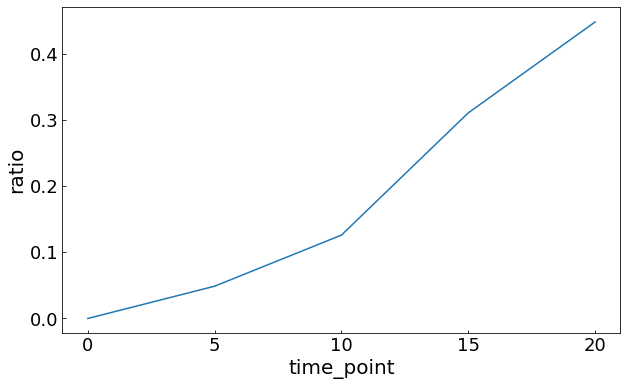

In [90]:
x=['0','5','10','15','20']
y=TP_norm_all_data.loc['percentage_of_T1_compared_to_all'].values
plt.figure(figsize=(10, 6))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.xlabel('time_point',fontsize=20)
plt.ylabel('ratio',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title('T1 compared to the sum of T1 and Ecoli(TP normalization)',fontsize=18)
plt.plot(x,y)
plt.savefig("The percentage of T1 compared to the sum of T1 and Ecoli(TP normalization)_sorted_new",dpi=150)

# split the raw counts of Ecoli and T1 separately

In [26]:
Ecoli_data = data.iloc[:4496]

In [28]:
t1_data = data.iloc[4496:]

In [29]:
Ecoli_data.tail()

,C0_1,C0_2,C0_3,C20_1,C20_2,C20_3,E5_1,E5_2,E5_3,E10_1,E10_2,E10_3,E15_1,E15_2,E20_1,E20_2,E20_3
gene_name,,,,,,,,,,,,,,,,,
creC,484,579,546,323,326,504,335,370,343,258,310,195,174,153,166,96,96
creD,199,279,205,147,145,246,149,175,142,263,256,223,183,131,146,96,116
arcA,10373,14952,16136,13415,18217,21421,9309,8504,9233,10004,7333,9892,6029,5374,4298,3118,5877
yjjY,4219,5102,4942,5287,5905,7333,3733,3428,3867,4151,2918,3510,2551,2086,1719,1289,2023
yjtD,1404,1569,1683,1479,1180,1525,1075,950,970,1066,826,712,699,503,467,338,411


In [30]:
t1_data.head()

,C0_1,C0_2,C0_3,C20_1,C20_2,C20_3,E5_1,E5_2,E5_3,E10_1,E10_2,E10_3,E15_1,E15_2,E20_1,E20_2,E20_3
gene_name,,,,,,,,,,,,,,,,,
77,4,0,0,0,0,0,45725,44777,63488,78339,61794,65668,69272,58109,63180,44836,49345
76,4,0,0,0,1,1,25366,25464,36884,47344,39820,40760,43872,37710,40890,28729,31421
75,0,0,0,0,0,1,37909,36400,50626,57744,43349,43077,41455,33001,32546,22543,25195
74,2,0,0,0,0,1,34132,34177,47834,59574,46682,47677,47237,37860,38482,26081,29934
73,1,0,0,0,0,0,19228,19510,27333,36183,29038,29326,30278,24297,25982,17266,20679


### separate the raw counts into three replicates

In [19]:
rep_1 = t1_data[['C0_1',"C20_1","E5_1","E10_1","E15_1","E20_1"]]
rep_2 = t1_data[['C0_2',"C20_2","E5_2","E10_2","E15_2","E20_2"]]
rep_3 = t1_data[['C0_3',"C20_3","E5_3","E10_3","E20_3"]]

In [26]:
rep_1.columns = ['C0','C20','E5','E10','E15','E20']
rep_2.columns = ['C0','C20','E5','E10','E15','E20']
rep_3.columns = ['C0','C20','E5','E10','E20']

In [24]:
rep_1

,C0,C20,E5,E10,E15,E20
gene,,,,,,
1,2.0,1.0,30723.0,45858.0,30521.0,20665.0
10,1.0,0.0,13299.0,26409.0,26944.0,29584.0
11,0.0,0.0,398.0,4395.0,53457.0,175148.0
12,0.0,0.0,363.0,5736.0,80870.0,254394.0
13,0.0,0.0,90.0,2401.0,35427.0,107606.0
...,...,...,...,...,...,...
75,2.0,0.0,39670.0,59998.0,44630.0,34959.0
76,4.0,0.0,33245.0,58946.0,54325.0,51070.0
77,4.0,0.0,46710.0,76544.0,66659.0,61244.0


In [28]:
rep_1.to_csv("./rep_1.csv",sep="\t")
rep_2.to_csv("./rep_2.csv",sep="\t")
rep_3.to_csv("./rep_3.csv",sep="\t")

## do the normalization TPM on Ecoli_data

In [31]:
gene_names_Ecoli = Ecoli_data.index

In [32]:
gene_names_Ecoli[:10]

Index(['thrL', 'thrA', 'thrB', 'thrC', 'yaaX', 'yaaA', 'yaaJ', 'talB', 'mog',
       'satP'],
      dtype='object', name='gene_name')

In [33]:
gene_lengths_Ecoli = [gtf.geneLength(i) for i in gene_names_Ecoli]

In [34]:
Ecoli_norm_data = TPMNormalization(Ecoli_data,gene_lengths_Ecoli)

In [35]:
Ecoli_norm_data

,C0_1,C0_2,C0_3,C20_1,C20_2,C20_3,E5_1,E5_2,E5_3,E10_1,E10_2,E10_3,E15_1,E15_2,E20_1,E20_2,E20_3
gene_name,,,,,,,,,,,,,,,,,
thrL,11.603567,28.959950,19.794071,14.425311,19.167673,12.511037,9.423939,11.990010,9.013034,14.170136,14.168906,9.659745,13.483225,16.272942,10.273876,11.376256,11.761709
thrA,49.926467,43.501631,61.492035,26.301775,43.467396,35.242230,20.052115,19.407957,23.074854,26.094160,19.929672,19.265504,28.772786,19.435348,19.878452,17.571511,32.192521
thrB,71.223206,58.165809,79.121604,24.284032,35.817855,27.734152,19.343704,16.304841,20.370430,27.425043,18.236875,18.546865,28.526939,20.819243,20.474888,17.995736,28.204089
thrC,94.831760,78.262470,103.514827,25.171794,32.542312,27.841562,21.732848,16.768222,21.117512,28.929261,17.687115,19.728702,32.090227,20.123651,21.461246,17.789809,31.549945
yaaX,26.347074,21.445084,22.769881,9.192631,9.677940,6.424923,8.269151,7.387130,8.159203,10.018577,7.762868,8.244295,12.249272,7.925886,8.181111,7.215388,8.973883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
creC,2.985069,6.931855,4.458526,2.417885,3.451519,2.517030,2.500169,3.313667,2.561413,2.477378,2.632653,1.934597,2.873483,2.062871,2.385145,1.940167,2.120527
creD,1.292645,3.517970,1.763070,1.158957,1.616880,1.293928,1.171191,1.650677,1.116840,2.659777,2.289755,2.330117,3.182933,1.860240,2.209411,2.043413,2.698657
arcA,124.372489,348.001459,256.156549,195.224638,374.956056,207.973707,135.063651,148.061185,134.041493,186.748472,121.066633,190.787917,193.559962,140.860464,120.056026,122.505289,252.370833


In [36]:
Ecoli_norm_data.to_csv('Ecoli_norm_data_F320.csv',sep="\t")

## Set a new dataframe to save all the means of TPM_Ecoli

In [26]:
Ecoli_mean = pd.DataFrame()

In [27]:
Ecoli_norm_data.head()

,C0_1,C0_2,C0_3,C20_1,C20_2,C20_3,E5_1,E5_2,E5_3,E10_1,E10_2,E10_3,E15_1,E15_2,E20_1,E20_2,E20_3
gene,,,,,,,,,,,,,,,,,
agrA,87.733089,91.397741,100.081523,45.189151,44.352538,43.946266,47.879315,57.599359,55.222371,66.815470,66.226294,45.414506,62.844746,62.665130,57.656637,44.234750,43.473471
agrB,28.034252,35.713256,24.603374,10.314915,11.088134,9.987788,13.075475,21.072936,17.638190,15.928146,37.587896,17.661197,17.996450,38.046686,19.007682,22.526956,6.210496
arcZ,6.020555,6.361278,6.079332,5.114834,8.005450,6.240304,5.339523,3.204480,3.433092,6.893022,4.349013,2.101828,4.164468,3.301572,2.859007,3.412047,3.079585
arrS,0.245530,6.578758,3.807449,0.398644,1.619832,0.694803,0.234088,0.000000,0.200678,0.000000,0.000000,0.000000,0.000000,0.000000,0.385663,0.000000,0.540043
chiX,5.848873,11.982737,7.923121,4.911864,8.870508,5.849990,7.306883,6.422228,7.253088,10.963529,10.291924,7.569084,10.855002,8.112896,9.503841,7.782039,6.654103


In [33]:
Ecoli_mean['mean_C0'] = Ecoli_norm_data.iloc[:,0:3].mean(axis=1)
Ecoli_mean['mean_E5'] = Ecoli_norm_data.loc[:,'C20_1':'C20_3'].mean(axis=1)
Ecoli_mean['mean_E10'] = Ecoli_norm_data.loc[:,'E5_1':'E5_3'].mean(axis=1)
Ecoli_mean['mean_E15'] = Ecoli_norm_data.iloc[:,12:14].mean(axis=1)
Ecoli_mean['mean_E20'] = Ecoli_norm_data.loc[:,'E20_1':'E20_3'].mean(axis=1)

In [34]:
Ecoli_mean

,mean_C0,mean_E5,mean_E10,mean_E15,mean_E20
gene,,,,,
agrA,93.070784,44.495985,53.567015,62.754938,48.454953
agrB,29.450294,10.463612,17.262201,28.021568,15.915045
arcZ,6.153722,6.453529,3.992365,3.733020,3.116879
arrS,3.543912,0.904426,0.144922,0.000000,0.308569
chiX,8.584910,6.544121,6.994066,9.483949,7.979994
...,...,...,...,...,...
pauD,6.101702,2.247822,3.002789,4.199713,2.262873
pawZ,38.284336,13.103291,19.670146,23.697761,30.195335
ptwF,8.557909,3.386276,3.374689,4.851457,2.244771


In [35]:
Ecoli_mean.sum()

mean_C0     1000000.0
mean_E5     1000000.0
mean_E10    1000000.0
mean_E15    1000000.0
mean_E20    1000000.0
dtype: float64

## do the normalization TPM on T1_data

In [37]:
gene_names = t1_data.index
gene_lengths = [gtf.geneLength(i) for i in gene_names]
t1_norm_data = TPMNormalization(t1_data,gene_lengths)

In [38]:
gene_names = t1_data.index

In [39]:
gene_names[:10]

Index(['77', '76', '75', '74', '73', '72', '71', '70', '69', '68'], dtype='object', name='gene_name')

In [40]:
help(gtf.geneLength)

Help on method geneLength in module pyCRAC.Parsers.GTF2:

geneLength(gene, type='gene', ranges=0) method of pyCRAC.Parsers.GTF2.Parse_GTF instance
    returns the length of a gene or transcript. If type is 'gene', it returns the length of a gene_name.
    If type= 'transcript' it returns the length of a transcript_name.



In [41]:
gene_lengths = [gtf.geneLength(i) for i in gene_names]

In [42]:
gene_names

Index(['77', '76', '75', '74', '73', '72', '71', '70', '69', '68', '67', '66',
       '65', '64', '63', '63A', '62', '61', '60', '59', '58', '57', '56', '55',
       '54', '53', '52', '51', '50', '49', '48', '47', '46', '45', '44', '43',
       '42', '41', '40', '39', '38', '37', '36', '35', '34', '33', '32', '31',
       '30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20', '19',
       '18', '17', '16', '15', '14', '13', '12', '11', '10', '9', '8', '7',
       '6', '5', '4', '3', '2', '1'],
      dtype='object', name='gene_name')

In [43]:
t1_norm_data = TPMNormalization(t1_data,gene_lengths)

In [44]:
t1_norm_data

,C0_1,C0_2,C0_3,C20_1,C20_2,C20_3,E5_1,E5_2,E5_3,E10_1,E10_2,E10_3,E15_1,E15_2,E20_1,E20_2,E20_3
gene_name,,,,,,,,,,,,,,,,,
77,13689.964140,0.000000,0.000000,0.000000,0.000000,0.000000,20224.814255,19336.883255,19301.584816,13600.152717,11628.617592,8499.869618,5546.930069,4819.863004,3108.996933,2835.642518,2772.912203
76,24114.432247,0.000000,0.000000,0.000000,19283.448758,25312.082732,19763.212779,19370.143519,19752.136015,14477.895587,13199.508708,9293.244868,6188.097216,5509.631536,3544.316638,3200.514943,3110.195575
75,0.000000,0.000000,0.000000,0.000000,0.000000,35831.389842,41810.336170,39196.146240,38378.274228,24996.726009,20340.956325,13903.189052,8277.179759,6825.412387,3993.455007,3555.059172,3530.350555
74,17292.586282,0.000000,0.000000,0.000000,0.000000,36302.855498,38139.957166,37286.623458,36738.858556,26128.240153,22193.146046,15590.320063,9555.752846,7933.403413,4783.942420,4167.124680,4249.573610
73,17759.953479,0.000000,0.000000,0.000000,0.000000,0.000000,44133.101160,43720.815721,43120.931051,32596.415007,28356.197071,19697.486402,12581.188037,10457.875107,6634.569611,5666.512620,6030.065138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,17523.154100,77634.360470,0.000000,0.000000,0.000000,0.000000,41550.636877,41435.351723,41956.819993,31973.801229,28938.242243,21190.391893,14636.976933,12215.479908,6767.066935,5521.177369,3810.069592
4,13689.964140,60651.844118,175424.080994,0.000000,0.000000,0.000000,19449.437559,20132.780163,21343.379228,15396.111050,13699.013597,10103.853054,6577.650762,5755.070207,3244.025227,2788.841388,2247.775623
3,18423.876974,0.000000,78694.914839,0.000000,0.000000,0.000000,16645.959569,17247.854157,18088.143873,13134.535452,11307.055782,8796.877960,5905.179493,5005.363369,2947.348187,2487.271409,2143.747727


In [66]:
rep_1 = t1_norm_data[["E5_1","E10_1","E15_1","E20_1"]]
rep_2 = t1_norm_data[["E5_2","E10_2","E15_2","E20_2"]]
rep_3 = t1_norm_data[["E5_3","E10_3","E20_3"]]

In [67]:
pwd

'/localdisk/home/openngs/openngs/notebooks/ngs/sander/phage_infection_time_course_e_coli_rnaseq/yan_results'

In [68]:
rep_1.to_csv("./rep_1_norm.csv",sep="\t")
rep_2.to_csv("./rep_2_norm.csv",sep="\t")
rep_3.to_csv("./rep_3_norm.csv",sep="\t")

In [45]:
t1_norm_data.to_csv('t1_norm_data_F320.csv',sep="\t")

## Set a new dataframe to save all the means of TPM_T1

In [46]:
t1_mean = pd.DataFrame()

In [47]:
t1_norm_data.head()

,C0_1,C0_2,C0_3,C20_1,C20_2,C20_3,E5_1,E5_2,E5_3,E10_1,E10_2,E10_3,E15_1,E15_2,E20_1,E20_2,E20_3
gene_name,,,,,,,,,,,,,,,,,
77,13689.964140,0.0,0.0,0.0,0.000000,0.000000,20224.814255,19336.883255,19301.584816,13600.152717,11628.617592,8499.869618,5546.930069,4819.863004,3108.996933,2835.642518,2772.912203
76,24114.432247,0.0,0.0,0.0,19283.448758,25312.082732,19763.212779,19370.143519,19752.136015,14477.895587,13199.508708,9293.244868,6188.097216,5509.631536,3544.316638,3200.514943,3110.195575
75,0.000000,0.0,0.0,0.0,0.000000,35831.389842,41810.336170,39196.146240,38378.274228,24996.726009,20340.956325,13903.189052,8277.179759,6825.412387,3993.455007,3555.059172,3530.350555
74,17292.586282,0.0,0.0,0.0,0.000000,36302.855498,38139.957166,37286.623458,36738.858556,26128.240153,22193.146046,15590.320063,9555.752846,7933.403413,4783.942420,4167.124680,4249.573610
73,17759.953479,0.0,0.0,0.0,0.000000,0.000000,44133.101160,43720.815721,43120.931051,32596.415007,28356.197071,19697.486402,12581.188037,10457.875107,6634.569611,5666.512620,6030.065138


In [48]:
t1_mean['mean_C0'] = t1_norm_data.iloc[:,0:3].mean(axis=1)
t1_mean['mean_C20'] = t1_norm_data.loc[:,'C20_1':'C20_3'].mean(axis=1)
t1_mean['mean_E5'] = t1_norm_data.loc[:,'E5_1':'E5_3'].mean(axis=1)
t1_mean['mean_E10'] = t1_norm_data.loc[:,'E10_1':'E10_3'].mean(axis=1)
t1_mean['mean_E15'] = t1_norm_data.iloc[:,12:14].mean(axis=1)
t1_mean['mean_E20'] = t1_norm_data.loc[:,'E20_1':'E20_3'].mean(axis=1)

In [49]:
t1_mean.columns

Index(['mean_C0', 'mean_C20', 'mean_E5', 'mean_E10', 'mean_E15', 'mean_E20'], dtype='object')

In [50]:
t1_mean.head()

,mean_C0,mean_C20,mean_E5,mean_E10,mean_E15,mean_E20
gene_name,,,,,,
77,4563.321380,0.000000,19621.094109,11242.879975,5183.396536,2905.850551
76,8038.144082,14865.177164,19628.497438,12323.549721,5848.864376,3285.009052
75,0.000000,11943.796614,39794.918880,19746.957128,7551.296073,3692.954911
74,5764.195427,12100.951833,37388.479726,21303.902087,8744.578130,4400.213570
73,5919.984493,0.000000,43658.282644,26883.366160,11519.531572,6110.382456


In [51]:
# set all the values in control group to 0
t1_mean.loc[:,"mean_C0":"mean_C20"] = 0

In [52]:
t1_mean.head()

,mean_C0,mean_C20,mean_E5,mean_E10,mean_E15,mean_E20
gene_name,,,,,,
77,0,0,19621.094109,11242.879975,5183.396536,2905.850551
76,0,0,19628.497438,12323.549721,5848.864376,3285.009052
75,0,0,39794.918880,19746.957128,7551.296073,3692.954911
74,0,0,37388.479726,21303.902087,8744.578130,4400.213570
73,0,0,43658.282644,26883.366160,11519.531572,6110.382456


In [53]:
column_names = ['mean_C0', 'mean_E5', 'mean_E10', 'mean_E15', 'mean_E20']

In [54]:
t1_mean['sum'] = t1_mean[column_names].sum(axis=1)

In [55]:
t1_mean

,mean_C0,mean_C20,mean_E5,mean_E10,mean_E15,mean_E20,sum
gene_name,,,,,,,
77,0,0,19621.094109,11242.879975,5183.396536,2905.850551,38953.221172
76,0,0,19628.497438,12323.549721,5848.864376,3285.009052,41085.920587
75,0,0,39794.918880,19746.957128,7551.296073,3692.954911,70786.126992
74,0,0,37388.479726,21303.902087,8744.578130,4400.213570,71837.173513
73,0,0,43658.282644,26883.366160,11519.531572,6110.382456,88171.562832
...,...,...,...,...,...,...,...
5,0,0,41647.602865,27367.478455,13426.228421,5366.104632,87807.414372
4,0,0,20308.532317,13066.325900,6166.360485,2760.214079,42301.432781
3,0,0,17327.319200,11079.489731,5455.271431,2526.122441,36388.202803


In [56]:
t1_mean.to_csv("t1_mean_F320.csv",sep="\t")